In [5]:
import single_head
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
import pickle
np.set_printoptions(threshold=sys.maxsize)
from scipy.signal import detrend
import matplotlib.gridspec as gridspec

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
Sequence=1

In [10]:
all_heads=[single_head.SingleHead.load_from_pickle(Sequence,i) for i in range (1,16)]

In [11]:
# make head from first to last
def make_mhead(all_heads, first, last):
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()   
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.links.append(multi_head.Link(left=all_heads[first+1].frame_id,right=all_heads[first].frame_id))
    for i in range(first+2,last+1):
        heads.links.append(multi_head.Link(left=all_heads[i].frame_id,right=all_heads[i-1].frame_id))
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()
        heads.append(all_heads[i])        
        if i==last:
             heads.links.append(multi_head.Link(left=all_heads[first].frame_id,right=all_heads[i].frame_id))
    print ("completed")
    return heads
mhead = make_mhead(all_heads, 0, 14)
mhead.calc_keypoints()

completed


NameError: name 'SIFT_edgeThreshold' is not defined

In [ ]:
idx=5
def calc_connections(mhead):
    for link in mhead.links:
        link.reset()
        mhead.ransac_from_link(link)        
calc_connections(mhead)

In [7]:
mhead=multi_head.MultiHead.load_from_pickle(1)

FileExistsError: pickled_head/mhead1.p could not be found, create pickled_head/mhead1.p by using .save() first 

NameError: name 'mhead' is not defined

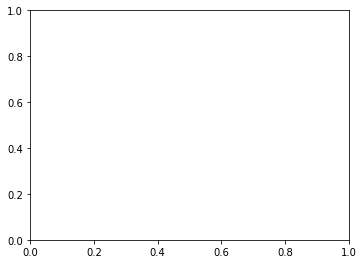

In [2]:
nrows,ncols=3,2
screenwidth=12
plt.figure(figsize = (screenwidth,3/4*nrows*screenwidth/ncols))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.1, hspace=0.1)
for row in range(nrows):
    for col in range(ncols):
        idx=ncols*row+col
        ax=plt.subplot(gs1[idx])
        mhead.heads[idx].background_color=np.array([0,0,1])
        img= mhead.heads[idx].get_filtered_image()
        ax.imshow(img)
        ax.set_axis_off()        
        ax.text(x=10, y=463 , s=f"S_{Sequence}:{idx+1}/15",horizontalalignment='left',
                              verticalalignment='bottom',  bbox=dict(facecolor='white', alpha=1))        
        del ax
plt.savefig(f"2d_filtered_seq_{Sequence}")
plt.show()